In [91]:
import numpy as np
import os
import matplotlib.pyplot as plt
from DoNN import *

# Gradient cheak

In [4]:
X = np.random.normal(0, 1, (1000,2))
Y = np.dot(X, np.random.normal(0, 2, (2,1)))

NN = DogikoNeuralNetwork()
NN.SetTrainData(X, Y)
NN.SetValidData(X, Y)
NN.SetTestData(X, Y)
NN.SetLossFunction("r2")
NN.SetRegularizer(0., 0.)
NN.AddHiddenLayer(2, Identity())
NN.AddHiddenLayer(2, Sigmoid())
NN.AddHiddenLayer(2, Hypertan())
NN.AddHiddenLayer(2, Relu())
NN.AddHiddenLayer(2, LeakyRelu())
NN.AddHiddenLayer(2, SoftPlus())
NN.SetOutputFunction(Selu())
NN.SetTerminator(10,20,-0.)
NN.Build(initial_strategy="Xavier")

step = 0.001

for l in range(NN.GetNumHiddenLayers()):
    for j in range(NN.hiddenLayerList[l].linear.value.shape[1]):
        for i in range(NN.hiddenLayerList[l].linear.value.shape[0]):
            b = NN.GetTrainLoss()
            NN.ZeroDeri()
            NN.Backward(X, Y)
            partial_deri = NN.hiddenLayerList[l].linear.total_deri[i, j]
            NN.hiddenLayerList[l].linear.value[i, j] += step
            a = NN.GetTrainLoss()
            if np.abs(((a-b)/step)/partial_deri - 1) > 0.01:
                print(((a-b)/step)/partial_deri - 1)
        
        b = NN.GetTrainLoss()
        NN.ZeroDeri()
        NN.Backward(X, Y)
        partial_deri = NN.hiddenLayerList[l].bias.total_deri[0, j]
        NN.hiddenLayerList[l].bias.value[0, j] += step
        a = NN.GetTrainLoss()
        if np.abs(((a-b)/step)/partial_deri - 1) > 0.01:
            print(((a-b)/step)/partial_deri - 1)

for j in range(NN.outputLayer.linear.value.shape[1]):
    for i in range(NN.outputLayer.linear.value.shape[0]):
        b = NN.GetTrainLoss()
        NN.ZeroDeri()
        NN.Backward(X, Y)
        partial_deri = NN.outputLayer.linear.total_deri[i, j]
        NN.outputLayer.linear.value[i, j] += step
        a = NN.GetTrainLoss()
        if np.abs(((a-b)/step)/partial_deri - 1) > 0.01:
            print(((a-b)/step)/partial_deri - 1)

    b = NN.GetTrainLoss()
    NN.ZeroDeri()
    NN.Backward(X, Y)
    partial_deri = NN.outputLayer.bias.total_deri[0, j]
    NN.outputLayer.bias.value[0, j] += step
    a = NN.GetTrainLoss()
    if np.abs(((a-b)/step)/partial_deri - 1) > 0.01:
        print(((a-b)/step)/partial_deri - 1)

print("done")

done


# Xavier initializer test

In [5]:
X = np.random.normal(0, 1, (1000,256))
Y = np.dot(X, np.random.normal(0, 1, (256,16)))

NN = DogikoNeuralNetwork()
NN.SetTrainData(X, Y)
NN.SetValidData(X, Y)
NN.SetTestData(X, Y)
NN.SetLossFunction("r2")
NN.SetRegularizer(0., 0.)
NN.AddHiddenLayer(2, Identity())
NN.SetOutputFunction(Hypertan())
NN.SetTerminator(10,20,-0.)
NN.Build(initial_strategy="Xavier")

In [6]:
for l in range(NN.GetNumHiddenLayers()):
    print(NN.hiddenLayerList[l].linear.value.var())
    print(NN.hiddenLayerList[l].bias.value.var())

print(NN.outputLayer.linear.value.var())
print(NN.outputLayer.bias.value.var())

0.00887325039195832
0.0004605327591410284
0.08557019083979728
0.03855732348986285


# Simple Case : Regression

In [51]:
X = ((np.arange(400)-200)/100).reshape(-1,1)
Y = np.zeros((X.shape[0], 1))

Y[:, :1] = np.random.randint(0, 2, X.shape)*(X>-1.0)*(X<-0.5) + 1*(X>-0.5)*(X<0.5) + np.random.randint(0, 2, X.shape)*(X>0.5)*(X<1.0)

NN = DogikoNeuralNetwork()
NN.SetTrainData(X, Y)
NN.SetValidData(X, Y)
NN.SetTestData(X, Y)
NN.SetLossFunction("r2")
NN.SetRegularizer(0.000001, 0.)
NN.AddHiddenLayer(2, Sigmoid())
NN.SetOutputFunction(Identity())
NN.SetTerminator(10,20,-0.01)
NN.Build(initial_strategy="Xavier")

0.3114939242899148


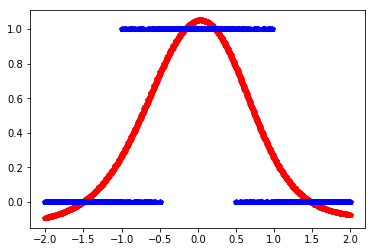

In [52]:
NN.Train(times=500, method="normal", step=0.1, is_termination=False)

print(NN.GetTrainLoss())

NN.GetInference(X)

plt.plot(X.reshape(-1), NN.GetInference(X).reshape(-1), "rp", X.reshape(-1), Y.reshape(-1), "bp")
plt.show()

# Simple Case : Classification

In [55]:
X = ((np.arange(400)-200)/100).reshape(-1,1)
Y = np.zeros((X.shape[0], 2))
Y[:, :1] = 1*(X>-1.)
Y[:, :1] *= 1*(X<1.)
Y[:, 1:] = 1 - Y[:, :1]

NN = DogikoNeuralNetwork()
NN.SetTrainData(X, Y)
NN.SetValidData(X, Y)
NN.SetTestData(X, Y)
NN.SetLossFunction("cross entropy")
NN.SetRegularizer(0.0001, 0.)
NN.AddHiddenLayer(10, Hypertan())
NN.SetOutputFunction(Softmax())
NN.SetTerminator(10,20,-0.01)
NN.Build()

In [56]:
print(NN.Train(times=1, method="normal", is_termination=False), end = ", ")
print(NN.hiddenLayerList[0].num_unit, NN.GetTrainAccuracy(), NN.GetTrainLoss())

for t in range(5):
    NN.UnitsRefined(layer_index=0, method="info", threshold=0.01)
    print(NN.Train(times=500, method="normal", is_termination=False), end = ", ")
    print(NN.hiddenLayerList[0].num_unit, NN.GetTrainAccuracy(), NN.GetTrainLoss())

1, 10 0.4975 0.7278271154198691
500, 2 1.0 0.028097873145394026
500, 2 1.0 0.021904371758533932
500, 2 1.0 0.01918063361417905
500, 2 1.0 0.017617294969389317
500, 2 1.0 0.016607472221535646


# Odd or even

## Regression

In [72]:
X = np.random.normal(0, 0.2, (700, 1))
Y = np.zeros(X.shape)
for i in range(7):
    X[i*100:(i+1)*100] += i-3
    Y[i*100:(i+1)*100] = 0.5*(1+(-1)**(i+1))

NN = DogikoNeuralNetwork()
NN.SetTrainData(X, Y)
NN.SetValidData(X, Y)
NN.SetTestData(X, Y)
NN.SetLossFunction("r2")
NN.SetRegularizer(0.0001, 0.)
NN.AddHiddenLayer(10, Hypertan())
NN.SetOutputFunction(Identity())
NN.Build(initial_strategy="Xavier")

1000, 0.05526185111168543, 

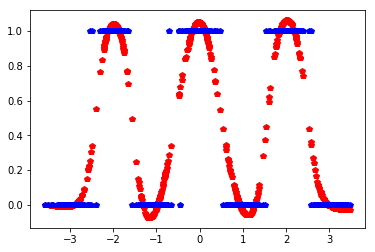

In [76]:
print(NN.Train(times=1000, method="normal", step=0.01, is_termination=False), end = ", ")
print(NN.GetTrainLoss(), end=", ")

samples = ((np.arange(500)-250)/100).reshape(-1,1)

NN.GetInference(samples)

plt.plot(X.reshape(-1), NN.GetInference(X).reshape(-1), "rp", X.reshape(-1), Y.reshape(-1), "bp")
plt.show()

# Odd or even

## Classification

In [68]:
X = np.random.normal(0, 0.1, (700, 1))
Y = np.zeros((X.shape[0], 2))
for i in range(7):
    X[i*100:(i+1)*100] += i-3
    Y[i*100:(i+1)*100, :1] = 0.5*(1+(-1)**(i+1))

Y[:,1:] = 1 - Y[:,:1]

NN = DogikoNeuralNetwork()
NN.SetTrainData(X, Y)
NN.SetValidData(X, Y)
NN.SetTestData(X, Y)
NN.SetLossFunction("cross entropy")
NN.SetRegularizer(0.0001, 0.)
NN.AddHiddenLayer(20, Hypertan())
NN.SetOutputFunction(Softmax())
NN.Build("Xavier")

1.0


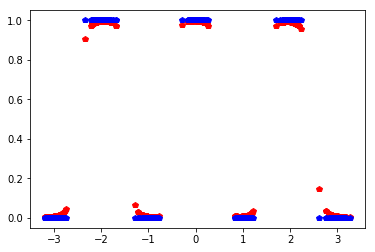

In [69]:
NN.Train(times=1000, method="normal", step=1, is_termination=False)
print(NN.GetTrainAccuracy())

samples = ((np.arange(700)-350)/100).reshape(-1,1)

NN.GetInference(samples)

plt.plot(X.reshape(-1), NN.GetInference(X)[:,0], "rp", X.reshape(-1), Y[:,0], "bp")
plt.show()

# Skew chessboard

In [79]:
X = 4*np.random.rand(20000,2) - 2
Y = np.zeros((X.shape[0],2))
Y[:, 0] = (((np.floor((X[:,0] + X[:,1])%2) + np.floor((X[:,0] - X[:,1])%2)) %2) == 1)
Y[:, 1] = 1- Y[:, 0]

In [80]:
NN = DogikoNeuralNetwork()
NN.SetTrainData(X[:10000], Y[:10000])
NN.SetValidData(X[10000:15000], Y[10000:15000])
NN.SetTestData(X[15000:], Y[15000:])
NN.SetLossFunction("cross entropy")
NN.SetRegularizer(0.0001, 1.)
NN.AddHiddenLayer(20, Hypertan())
NN.AddHiddenLayer(20, Hypertan())
NN.SetOutputFunction(Softmax())
NN.SetTerminator(10,30, -0.1)
NN.Build()

NN.Train(times=1000, batch_size=10000, method="Rprop", is_termination=True, accuracy_record=True)

### Training directly

In [82]:
NN = DogikoNeuralNetwork()
NN.SetTrainData(X[:10000], Y[:10000])
NN.SetValidData(X[10000:15000], Y[10000:15000])
NN.SetTestData(X[15000:], Y[15000:])
NN.SetLossFunction("cross entropy")
NN.SetRegularizer(0.0001, 1.)
NN.AddHiddenLayer(20, Hypertan())
NN.AddHiddenLayer(20, Hypertan())
NN.SetOutputFunction(Softmax())
NN.SetTerminator(10,30, -0.)

times = 10
record = np.zeros((times))
for t in range(times):
    NN.Build(initial_strategy="Xavier")
    print(NN.Train(times=1000, batch_size=10000, method="Rprop", is_termination=True), end = ", ")
    for l in range(NN.GetNumHiddenLayers()):
        print(NN.hiddenLayerList[l].num_unit, end = ", ")
    
    print(NN.GetTrainAccuracy(), NN.GetValidAccuracy(), NN.GetTestAccuracy())
    record[t] = NN.GetTestAccuracy()

38, 20, 20, 0.5295 0.518 0.5258
1000, 20, 20, 0.8442 0.8366 0.8296
1000, 20, 20, 0.862 0.859 0.8572
1000, 20, 20, 0.9078 0.8994 0.9016
1000, 20, 20, 0.7877 0.778 0.7826
1000, 20, 20, 0.8847 0.8866 0.884
1000, 20, 20, 0.9601 0.9546 0.961
1000, 20, 20, 0.8079 0.7972 0.8108
1000, 20, 20, 0.8405 0.8394 0.839
1000, 20, 20, 0.9673 0.9604 0.9628


### Repeat add-fit-kill-fit for fix number of units

109, 0.5598 0.5506 0.555
392, 0.6297 0.6304 0.6286
181, 0.6941 0.6996 0.7006
250, 0.7531 0.7574 0.7562
427, 0.8901 0.8934 0.8856
500, 0.9189 0.9196 0.9114
216, 0.9345 0.9254 0.9276
140, 0.9447 0.9364 0.9392
170, 0.9495 0.9436 0.9438
149, 0.9464 0.9394 0.9414
107, 0.9509 0.9452 0.9464
87, 0.9537 0.9452 0.9498
27, 0.9542 0.9458 0.9472
43, 0.954 0.947 0.9478
52, 0.9586 0.9496 0.9512
41, 0.9566 0.9456 0.9496
81, 0.9577 0.9512 0.952
79, 0.9592 0.9524 0.949
33, 0.9602 0.9528 0.9528
16, 0.9621 0.9534 0.9514
50, 0.9635 0.9546 0.9528
24, 0.9629 0.9536 0.953
24, 0.9617 0.952 0.9522
79, 0.964 0.954 0.9552
28, 0.9648 0.9564 0.9548
96, 0.9656 0.956 0.9538
17, 0.9648 0.9582 0.956
63, 0.9644 0.9558 0.9534
83, 0.9659 0.9572 0.9566
26, 0.9664 0.9558 0.957
39, 0.965 0.9548 0.9542


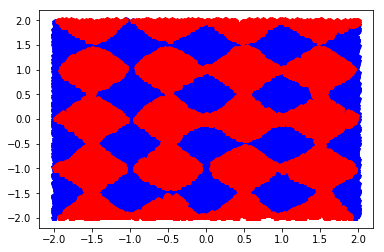

In [83]:
NN = DogikoNeuralNetwork()
NN.SetTrainData(X[:10000], Y[:10000])
NN.SetValidData(X[10000:15000], Y[10000:15000])
NN.SetTestData(X[15000:], Y[15000:])
NN.SetLossFunction("cross entropy")
NN.SetRegularizer(0.001, 2.)
NN.AddHiddenLayer(20, Hypertan())
NN.AddHiddenLayer(20, Hypertan())
NN.SetOutputFunction(Softmax())
NN.SetTerminator(5,10, -0.)

NN.Build()

print(NN.Train(times=500, batch_size=5000, method="Rprop", is_termination=True), end = ", ")
print(NN.GetTrainAccuracy(), NN.GetValidAccuracy(), NN.GetTestAccuracy())

for t in range(30):
    for l in range(NN.GetNumHiddenLayers()):
        NN.UnitsRefined(layer_index=l, method="remove", threshold=2)
        NN.AddUnit(layer_index=l, num_added=2, output_linear_bound=0.001)
    
    NN.ResetCwiseStep(0.01)
    print(NN.Train(times=500, batch_size=5000, method="Rprop", is_termination=True, shuffling=True), end = ", ")    
    print(NN.GetTrainAccuracy(), NN.GetValidAccuracy(), NN.GetTestAccuracy())

I = NN.GetInference(X)[:, 0]
plt.plot(X[:, 0][I>0.5], X[:, 1][I>0.5], "bp")
plt.plot(X[:, 0][I<0.5], X[:, 1][I<0.5], "rp")
plt.show()

### Find suitable units by info ratio of layer output

786, 20, 20, 0.6674 0.6738 0.681
1000, 1000, 13, 20, 0.9442 0.9344 0.9368
1000, 1000, 12, 20, 0.9568 0.9464 0.9476
1000, 382, 13, 21, 0.9736 0.9654 0.9664
807, 821, 13, 22, 0.9766 0.9694 0.9704
186, 35, 13, 23, 0.977 0.9696 0.9714
53, 272, 13, 23, 0.9779 0.9702 0.9698
53, 282, 13, 24, 0.9782 0.9708 0.9716
166, 149, 12, 24, 0.9714 0.9628 0.9656
494, 83, 13, 24, 0.976 0.9694 0.971
362, 144, 13, 24, 0.9774 0.9694 0.9718
46, 85, 13, 24, 0.9774 0.9696 0.9722
222, 193, 13, 24, 0.978 0.9704 0.9724
32, 47, 13, 24, 0.9782 0.9704 0.973
42, 40, 13, 24, 0.9785 0.9704 0.972
41, 119, 13, 24, 0.9788 0.9702 0.9726
46, 50, 13, 24, 0.9794 0.9708 0.9726
39, 38, 13, 25, 0.9798 0.9718 0.9724
42, 115, 13, 25, 0.9797 0.9712 0.9724
111, 127, 13, 25, 0.9805 0.9714 0.9718
111, 94, 13, 25, 0.9802 0.9706 0.9726


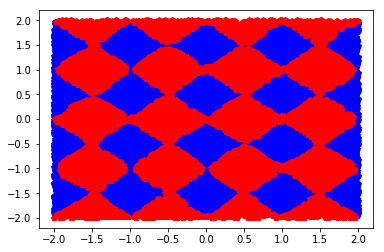

In [84]:
NN = DogikoNeuralNetwork()
NN.SetTrainData(X[:10000], Y[:10000])
NN.SetValidData(X[10000:15000], Y[10000:15000])
NN.SetTestData(X[15000:], Y[15000:])
NN.SetLossFunction("cross entropy")
NN.SetRegularizer(0.0001, 1.)
NN.AddHiddenLayer(20, Hypertan())
NN.AddHiddenLayer(20, Hypertan())
NN.SetOutputFunction(Softmax())
NN.SetTerminator(10,30, -0.)

NN.Build()

print(NN.Train(times=1000, batch_size=5000, method="Rprop", is_termination=True), end = ", ")
for l in range(NN.GetNumHiddenLayers()):
    print(NN.hiddenLayerList[l].num_unit, end = ", ")

print(NN.GetTrainAccuracy(), NN.GetValidAccuracy(), NN.GetTestAccuracy())

for t in range(20):
    for l in range(NN.GetNumHiddenLayers()):
        NN.AddUnit(layer_index=l, num_added=1, output_linear_bound=0.01)
    
    NN.ResetCwiseStep(0.001)
    print(NN.Train(times=1000, batch_size=10000, method="Rprop", is_termination=True), end = ", ")
    for l in range(NN.GetNumHiddenLayers()):
        NN.UnitsRefined(layer_index=l, method="info ratio", threshold=0.001)
    
    NN.ResetCwiseStep(0.001)
    print(NN.Train(times=1000, batch_size=10000, method="Rprop", is_termination=True), end = ", ")
    for l in range(NN.GetNumHiddenLayers()):
        print(NN.hiddenLayerList[l].num_unit, end = ", ")
    
    print(NN.GetTrainAccuracy(), NN.GetValidAccuracy(), NN.GetTestAccuracy())

I = NN.GetInference(X)[:, 0]
plt.plot(X[:, 0][I>0.5], X[:, 1][I>0.5], "bp")
plt.plot(X[:, 0][I<0.5], X[:, 1][I<0.5], "rp")
plt.show()

# "Is Skin" on UCI

raw data https://archive.ics.uci.edu/ml/datasets/skin+segmentation

In [85]:
X = np.load("../UCI/Is-skin/data-npy/data.npy").astype(np.float64)
Y = np.load("../UCI/Is-skin/data-npy/label.npy").astype(np.float64)
X *= 2/255
X -= 1
shuffle = np.arange(X.shape[0])
np.random.shuffle(shuffle)
X = X[shuffle]
Y = Y[shuffle]

### Train directly

In [86]:
NN = DogikoNeuralNetwork()
NN.SetTrainData(X[:150000], Y[:150000])
NN.SetValidData(X[150000:200000], Y[150000:200000])
NN.SetTestData(X[200000:], Y[200000:])
NN.SetLossFunction("cross entropy")
NN.SetRegularizer(0.0001, 0.)
NN.AddHiddenLayer(2, Hypertan())
NN.SetOutputFunction(Softmax())
NN.SetTerminator(10,30, -0.01)
for t in range(10):
    NN.Build()
    print(NN.Train(times=2000, batch_size=50000, method="Rprop", is_termination=True), end = ", ")
    print(NN.GetTrainAccuracy(), NN.GetValidAccuracy(), NN.GetTestAccuracy())

96, 0.9779 0.979 0.9774
115, 0.9771 0.9782 0.9766
108, 0.9943 0.9945 0.9942
139, 0.9767 0.9776 0.9767
95, 0.9771 0.9781 0.9765
160, 0.9944 0.9945 0.9941
201, 0.9928 0.993 0.993
94, 0.9784 0.9794 0.9779
112, 0.9941 0.9944 0.994
102, 0.9941 0.9935 0.9941


### Repeat add-fit-kill-fit for fix number of units

In [88]:
NN = DogikoNeuralNetwork()
NN.SetTrainData(X[:150000], Y[:150000])
NN.SetValidData(X[150000:200000], Y[150000:200000])
NN.SetTestData(X[200000:], Y[200000:])
NN.SetLossFunction("cross entropy")
NN.SetRegularizer(0.0001, 1.)
NN.AddHiddenLayer(2, Hypertan())
NN.SetOutputFunction(Softmax())
NN.SetTerminator(10,30, -0.)

NN.Build()

print(NN.Train(times=2000, batch_size=50000, method="Rprop", is_termination=True), end = ", ")
for l in range(NN.GetNumHiddenLayers()):
    print(NN.hiddenLayerList[l].num_unit, end = ", ")

print(NN.GetTrainAccuracy(), NN.GetValidAccuracy(), NN.GetTestAccuracy())

for t in range(10):
    for l in range(NN.GetNumHiddenLayers()):
        NN.AddUnit(layer_index=l, num_added=1, output_linear_bound=0.01)
    
    NN.ResetCwiseStep(0.001)
    print(NN.Train(times=2000, batch_size=50000, method="Rprop", is_termination=True), end = ", ")
    for l in range(NN.GetNumHiddenLayers()):
        NN.UnitsRefined(layer_index=l, method="remain", threshold=2)
    
    NN.ResetCwiseStep(0.001)
    print(NN.Train(times=2000, batch_size=50000, method="Rprop", is_termination=True), end = ", ")
    for l in range(NN.GetNumHiddenLayers()):
        print(NN.hiddenLayerList[l].num_unit, end = ", ")
    
    print(NN.GetTrainAccuracy(), NN.GetValidAccuracy(), NN.GetTestAccuracy())

322, 2, 0.9945 0.9944 0.9944
314, 38, 2, 0.9951 0.9947 0.9953
202, 45, 2, 0.9949 0.9946 0.9953
382, 83, 2, 0.9949 0.9945 0.9952
176, 39, 2, 0.9947 0.9947 0.9949
2000, 2000, 2, 0.9947 0.9946 0.9948
187, 50, 2, 0.9947 0.9946 0.9948
143, 2000, 2, 0.9946 0.9944 0.9946
186, 54, 2, 0.9952 0.9949 0.9955
386, 60, 2, 0.9951 0.9947 0.9954
169, 2000, 2, 0.9947 0.9946 0.9949


### Find suitable units by info ratio of layer output

In [90]:
NN = DogikoNeuralNetwork()
NN.SetTrainData(X[:150000], Y[:150000])
NN.SetValidData(X[150000:200000], Y[150000:200000])
NN.SetTestData(X[200000:], Y[200000:])
NN.SetLossFunction("cross entropy")
NN.SetRegularizer(0.0001, 0.)
NN.AddHiddenLayer(10, Hypertan())
NN.SetOutputFunction(Softmax())
NN.SetTerminator(10,30, -0.01)

NN.Build()

print(NN.Train(times=2000, batch_size=50000, method="Rprop", is_termination=True), end = ", ")
for l in range(NN.GetNumHiddenLayers()):
    print(NN.hiddenLayerList[l].num_unit, end = ", ")

print(NN.GetTrainAccuracy(), NN.GetValidAccuracy(), NN.GetTestAccuracy())

for t in range(5):
    for l in range(NN.GetNumHiddenLayers()):
        NN.AddUnit(layer_index=l, num_added=1, output_linear_bound=0.01)
    
    NN.ResetCwiseStep(0.001)
    print(NN.Train(times=2000, batch_size=50000, method="Rprop", is_termination=True), end = ", ")
    for l in range(NN.GetNumHiddenLayers()):
        NN.UnitsRefined(layer_index=l, method="info ratio", threshold=0.0001)
    
    NN.ResetCwiseStep(0.001)
    print(NN.Train(times=2000, batch_size=50000, method="Rprop", is_termination=True), end = ", ")
    for l in range(NN.GetNumHiddenLayers()):
        print(NN.hiddenLayerList[l].num_unit, end = ", ")
    
    print(NN.GetTrainAccuracy(), NN.GetValidAccuracy(), NN.GetTestAccuracy())

107, 10, 0.995 0.9952 0.9948
43, 30, 8, 0.9953 0.9956 0.9952
30, 30, 7, 0.9954 0.9956 0.9952
30, 30, 7, 0.9955 0.9956 0.9954
106, 30, 8, 0.9955 0.9957 0.9951
30, 30, 8, 0.9955 0.9957 0.9951


# MNIST

In [154]:
NN = DogikoNeuralNetwork()

mnist_train_X = np.load("../mnist-npy/train_data.npy")*2/255 - 1
mnist_train_Y = np.load("../mnist-npy/train_label.npy")

shuffle = np.arange(60000)
np.random.shuffle(shuffle)

mnist_test_X = np.load("../mnist-npy/test_data.npy")*2/255 - 1
mnist_test_Y = np.load("../mnist-npy/test_label.npy")

NN.SetTrainData(mnist_train_X[:55000], mnist_train_Y[:55000])
NN.SetValidData(mnist_train_X[55000:], mnist_train_Y[55000:])
NN.SetTestData(mnist_test_X, mnist_test_Y)
NN.SetLossFunction("cross entropy")
NN.SetRegularizer(0., 0.00001)
NN.AddHiddenLayer(50, Hypertan())

NN.SetOutputFunction(Softmax())
NN.SetTerminator(5,10, -0.1)
NN.Build()

In [156]:
NN.Train(init_cwise_step=0.001, method="Rprop", times= 200, max_move=0.1)
print("done")

done


In [ ]:
for t in range(10):
    for l in range(NN.GetNumHiddenLayers()):
        NN.UnitsModify(layer_index=l, set_num_unit=49,output_linear_bound=0.001)
        NN.UnitsModify(layer_index=l, set_num_unit=50,output_linear_bound=0.001)
    
    print(NN.Train(init_cwise_step=0.001, method="Rprop", times= 40, max_move=0.1), NN.GetTestAccuracy())

### Repeat test

In [ ]:
NN = DogikoNeuralNetwork()

mnist_train_X = np.load("../mnist-npy/train_data.npy")*2/255 - 1
mnist_train_Y = np.load("../mnist-npy/train_label.npy")
mnist_test_X = np.load("../mnist-npy/test_data.npy")*2/255 - 1
mnist_test_Y = np.load("../mnist-npy/test_label.npy")

num_layers = 1
num_units = 5

path = "../mnist-test/Case-5x1"

try:
    NN.LoadModel(path + "/model")
except:
    shuffle = np.arange(60000)
    np.random.shuffle(shuffle)
    
    NN.SetTrainData(mnist_train_X[:55000], mnist_train_Y[:55000])
    NN.SetValidData(mnist_train_X[55000:], mnist_train_Y[55000:])
    NN.SetTestData(mnist_test_X, mnist_test_Y)
    NN.SetLossFunction("cross entropy")
    NN.SetRegularizer(0., 0.)
    for l in range(num_layers):
        NN.AddHiddenLayer(num_units, Hypertan())
    
    NN.SetOutputFunction(Softmax())
    NN.SetTerminator(5,10, -0.)
    NN.Build()
    NN.SaveModel(path + "/model")

try:
    timer = np.load(path + "/timer.npy")
except:
    timer = np.zeros((), dtype=np.int)

rounds = 10
try:
    record = np.load(path + "/record.npy")
except:
    record = np.zeros((100, rounds+1))

bound = 0.001
while timer < 100:
    shuffle = np.arange(60000)
    np.random.shuffle(shuffle)
    mnist_train_X = mnist_train_X[shuffle]
    mnist_train_Y = mnist_train_Y[shuffle]
    NN.SetTrainData(mnist_train_X[:55000], mnist_train_Y[:55000])
    NN.SetValidData(mnist_train_X[55000:], mnist_train_Y[55000:])
    NN.SetTestData(mnist_test_X, mnist_test_Y)
    NN.Build() # reset weights
    
    for r in range(rounds+1):
        if r > 0:
            for l in range(NN.GetNumHiddenLayers()):
                NN.UnitsModify(layer_index=l, set_num_unit=num_units+1, output_linear_bound=bound)
            
            NN.Train(init_cwise_step=0.001, method="Rprop", times= 40, max_move=0.1, is_termination=False)
        
        for l in range(NN.GetNumHiddenLayers()):
            NN.UnitsModify(layer_index=l, set_num_unit=num_units, output_linear_bound=bound)
        
        NN.Train(init_cwise_step=0.001, method="Rprop", times= 40, max_move=0.1, is_termination=False)
        record[timer, r] = NN.GetTestAccuracy()
    
    timer += 1
    np.save(path + "/timer.npy", timer)
    np.save(path + "/record.npy", record)
    print(timer)

In [11]:
record[:7]

array([[0.8149, 0.86  , 0.8704, 0.8742, 0.8765, 0.8783, 0.8828, 0.8847,
        0.886 , 0.8872, 0.8873],
       [0.7606, 0.852 , 0.8626, 0.8667, 0.8701, 0.8729, 0.8754, 0.877 ,
        0.8778, 0.88  , 0.8799],
       [0.8007, 0.8517, 0.8717, 0.8778, 0.8808, 0.8852, 0.8884, 0.8918,
        0.8935, 0.8945, 0.8944],
       [0.7293, 0.8401, 0.8616, 0.8718, 0.8767, 0.8815, 0.8861, 0.8872,
        0.8902, 0.8913, 0.8921],
       [0.8026, 0.857 , 0.8639, 0.8697, 0.8766, 0.8812, 0.8831, 0.8875,
        0.8885, 0.8903, 0.8916],
       [0.7449, 0.8408, 0.8587, 0.8707, 0.8786, 0.8828, 0.8868, 0.8896,
        0.8935, 0.8946, 0.8954],
       [0.7955, 0.8662, 0.8791, 0.8819, 0.8862, 0.8881, 0.8892, 0.8905,
        0.8928, 0.8932, 0.8928]])